In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

Importing the file created in previous part of project (refer SVM notebook)

In [2]:
#df_raw = pd.read_csv("Aish_Project.csv")
df_raw = pd.read_csv("final_dataframe_with_labels (2).csv")
df_raw.head(5)

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,updated_on,latitude,longitude,cluster
0,13431715,JH228235,2024-04-14 00:00:00,002XX E HURON ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,18,2,8,02,2024,2024-04-21 15:40:50,41.895003,-87.621528,2
1,13429030,JH224976,2024-04-14 00:00:00,062XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,311,3,20,40,08B,2024,2024-04-21 15:40:50,41.780946,-87.621995,1
2,13428596,JH224360,2024-04-14 00:00:00,023XX E 93RD ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,413,4,7,48,02,2024,2024-04-21 15:40:50,41.726219,-87.567294,2
3,13428850,JH224732,2024-04-14 00:00:00,017XX E 86TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,412,4,8,45,07,2024,2024-04-21 15:40:50,41.737879,-87.581669,2
4,13428796,JH224490,2024-04-14 00:00:00,0000X W 111TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,522,5,9,49,06,2024,2024-04-21 15:40:50,41.692566,-87.624705,0


#### Data Preprocessing:

- Data cleaning:

In [3]:
df_raw.shape

(987, 20)

In [4]:
df_raw.columns

Index(['id', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'year', 'updated_on',
       'latitude', 'longitude', 'cluster'],
      dtype='object')

In [5]:
columns_drop = ["id", "date", "updated_on"]

df_raw = df_raw.drop(columns = columns_drop)
print(df_raw.shape)
df_raw

(987, 17)


,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude,cluster
0,JH228235,002XX E HURON ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,1834,18,2,8,02,2024,41.895003,-87.621528,2
1,JH224976,062XX S MICHIGAN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,311,3,20,40,08B,2024,41.780946,-87.621995,1
2,JH224360,023XX E 93RD ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING / GROUNDS,False,False,413,4,7,48,02,2024,41.726219,-87.567294,2
3,JH224732,017XX E 86TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,412,4,8,45,07,2024,41.737879,-87.581669,2
4,JH224490,0000X W 111TH ST,0820,THEFT,$500 AND UNDER,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,522,5,9,49,06,2024,41.692566,-87.624705,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,JH222603,034XX N OSCEOLA AVE,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC GROUNDS,False,False,1631,16,38,17,08B,2024,41.942249,-87.813008,2
983,JH222557,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,111,1,34,32,06,2024,41.883500,-87.627877,0
984,JH222598,002XX S HAMLIN BLVD,0810,THEFT,OVER $500,APARTMENT,False,False,1122,11,28,26,06,2024,41.877756,-87.720642,0
985,JH222601,008XX N CENTRAL AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,True,1511,15,29,25,04B,2024,41.895080,-87.765400,1


In [6]:
#Categorical columns
cat_columns = [column for column in df_raw.columns if df_raw[column].dtype == 'object']

#Numerical columns
num_columns = [column for column in df_raw.columns if df_raw[column].dtype != 'object']

len(cat_columns), len(num_columns)

(7, 10)

In [7]:
df_raw.isnull().sum()

case_number             0
block                   0
iucr                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
fbi_code                0
year                    0
latitude                0
longitude               0
cluster                 0
dtype: int64

In [8]:
label_counts = df_raw['cluster'].value_counts()
print(label_counts)


cluster
2    468
1    299
0    220
Name: count, dtype: int64


- Train test split

In [9]:
from sklearn.model_selection import train_test_split

X= df_raw.drop("cluster", axis =1)
y= df_raw["cluster"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
756,JH222929,0000X W MAPLE ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,1824,18,2,8,06,2024,41.901873,-87.629199
716,JH223000,001XX S WESTERN AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1125,11,27,28,15,2024,41.879649,-87.686393
49,JH224165,009XX N PULASKI RD,0313,ROBBERY,ARMED - OTHER DANGEROUS WEAPON,COMMERCIAL / BUSINESS OFFICE,False,False,1112,11,37,23,03,2024,41.898176,-87.726170
718,JH226422,011XX W FULTON MARKET,0820,THEFT,$500 AND UNDER,STREET,False,False,1214,12,27,28,06,2024,41.886687,-87.654798
371,JH223708,023XX W MADISON ST,1330,CRIMINAL TRESPASS,TO LAND,GROCERY FOOD STORE,True,False,1223,12,27,28,26,2024,41.881183,-87.684982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,JH228352,0000X W DIVISION ST,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,BAR OR TAVERN,True,False,1824,18,2,8,22,2024,41.903932,-87.629309
270,JH224334,074XX S ST LAWRENCE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,323,3,6,69,14,2024,41.759750,-87.610285
860,JH222712,0000X E ERIE ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,1834,18,42,8,15,2024,41.894079,-87.627797
435,JH223823,084XX S HONORE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,614,6,18,71,08B,2024,41.740715,-87.669264


In [11]:
X_test

,case_number,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
309,JH223754,007XX S SEELEY AVE,0560,ASSAULT,SIMPLE,RESTAURANT,False,False,1225,12,28,28,08A,2024,41.872612,-87.677590
139,JH224280,080XX S PRINCETON AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,623,6,17,44,04A,2024,41.748380,-87.631817
499,JH227254,075XX S COTTAGE GROVE AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,624,6,6,69,07,2024,41.758125,-87.605377
854,JH222870,003XX E ERIE ST,0820,THEFT,$500 AND UNDER,GOVERNMENT BUILDING / PROPERTY,False,False,1834,18,2,8,06,2024,41.894230,-87.618962
88,JH231590,004XX E WATERSIDE DR,0460,BATTERY,SIMPLE,APARTMENT,False,False,114,1,42,32,08B,2024,41.886945,-87.615529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,JH223886,040XX S KEDZIE AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,821,8,12,58,04A,2024,41.820564,-87.704462
628,JH223224,0000X E 71ST ST,0320,ROBBERY,STRONG ARM - NO WEAPON,STREET,False,False,322,3,6,69,03,2024,41.765571,-87.622092
456,JH223499,048XX N WESTERN AVE,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,2031,20,47,4,06,2024,41.968891,-87.688914
536,JH223345,003XX S PLYMOUTH CT,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,113,1,4,32,08B,2024,41.877726,-87.628737


In [12]:
y_train

756    0
716    2
49     2
718    0
371    2
      ..
106    2
270    1
860    2
435    1
102    2
Name: cluster, Length: 789, dtype: int64

In [13]:
y_test

309    2
139    2
499    2
854    0
88     1
      ..
657    2
628    2
456    0
536    2
296    2
Name: cluster, Length: 198, dtype: int64

- Data transformation

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Identifying categorical and numerical columns in X_train
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_columns = [col for col in X_train.columns if X_train[col].dtype != 'object']

# Creating preprocessing pipelines for categorical data
categorical_preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Creating preprocessing pipelines for numerical data
numerical_preprocessing = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combining preprocessing steps with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessing, numerical_columns),
        ('cat', categorical_preprocessing, categorical_columns)
    ]
)

# Fitting the preprocessor on the training data
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['arrest', 'domestic', 'beat', 'district',
                                  'ward', 'community_area', 'year', 'latitude',
                                  'longitude']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['case_number', 'block', 'iucr',
                                  'primary_type', 'description',
                                  'location_description', 'fbi_code'])])

In [15]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the processed training data
decision_tree_model.fit(X_train_processed, y_train)

# Predict on the processed validation data
y_test_pred_dt = decision_tree_model.predict(X_test_processed)

# Evaluate the model
accuracy_val_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Validation Accuracy: {accuracy_val_dt}")
print(classification_report(y_test, y_test_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_dt)
print(cm)

Validation Accuracy: 0.9747474747474747
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.98      0.95      0.96        58
           2       0.96      1.00      0.98        92

    accuracy                           0.97       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.97      0.97       198

[[46  1  1]
 [ 0 55  3]
 [ 0  0 92]]


## SVM

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the SVM model
svm_model = SVC(kernel ='rbf', C=1, random_state=42)

# Fit the model on the processed training data
svm_model.fit(X_train_processed, y_train)

# Predict on the processed validation data
y_test_pred_svm = svm_model.predict(X_test_processed)

# Evaluate the model
accuracy_val_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"Validation Accuracy: {accuracy_val_svm}")
print(classification_report(y_test, y_test_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_svm)
print(cm)


Validation Accuracy: 0.9343434343434344
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        48
           1       1.00      0.91      0.95        58
           2       0.88      1.00      0.93        92

    accuracy                           0.93       198
   macro avg       0.96      0.92      0.93       198
weighted avg       0.94      0.93      0.93       198

[[40  0  8]
 [ 0 53  5]
 [ 0  0 92]]


## Neural Network

In [18]:
!pip install tensorflow

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the labels in the training set
y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.fit_transform(y_test)

### With epoches=5

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

model = Sequential([
    Dense(3, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Defining EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fitting the model
history = model.fit(X_train_processed, y_train_encoded,
                    validation_data=(X_test_processed, y_test_encoded),
                    epochs=5,  # Adjust the number of epochs based on the training dynamics
                    callbacks=[early_stopping],
                    batch_size=32)  # Batch size can be adjusted

y_test_pred_dl = model.predict(X_test_processed)
y_test_pred_dl = tf.argmax(y_test_pred_dl, axis=1).numpy()  # Corrected variable name and convert predictions to label indices

# Evaluating the model
accuracy_val_dl = accuracy_score(y_test_encoded, y_test_pred_dl)  # Corrected to compare encoded labels with predicted labels
print(f"Validation Accuracy: {accuracy_val_dl}")
print(classification_report(y_test_encoded, y_test_pred_dl))  # Corrected arguments

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred_dl)  # Corrected arguments
print(cm)


Epoch 1/5
25/25 [==============================] - 2s 25ms/step - loss: 1.0840 - accuracy: 0.4132 - val_loss: 1.0619 - val_accuracy: 0.5253
Epoch 2/5
25/25 [==============================] - 0s 7ms/step - loss: 1.0385 - accuracy: 0.5995 - val_loss: 1.0210 - val_accuracy: 0.6212
Epoch 3/5
25/25 [==============================] - 0s 9ms/step - loss: 0.9847 - accuracy: 0.6616 - val_loss: 0.9689 - val_accuracy: 0.6515
Epoch 4/5
25/25 [==============================] - 0s 5ms/step - loss: 0.9211 - accuracy: 0.6768 - val_loss: 0.9103 - val_accuracy: 0.6667
Epoch 5/5
7/7 [==============================] - 0s 2ms/step
Validation Accuracy: 0.6717171717171717
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        48
           1       0.00      0.00      0.00        58
           2       0.59      1.00      0.74        92

    accuracy                           0.67       198
   macro avg       0.52      0.62      0.55       198
weighted avg    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With Epoches=10

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

model = Sequential([
    Dense(3, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fitting the model
history = model.fit(X_train_processed, y_train_encoded,
                    validation_data=(X_test_processed, y_test_encoded),
                    epochs=10,
                    callbacks=[early_stopping],
                    batch_size=32)

y_test_pred_dl = model.predict(X_test_processed)
y_test_pred_dl = tf.argmax(y_test_pred_dl, axis=1).numpy()

# Evaluating the model
accuracy_val_dl = accuracy_score(y_test_encoded, y_test_pred_dl)
print(f"Validation Accuracy: {accuracy_val_dl}")
print(classification_report(y_test_encoded, y_test_pred_dl))  # Corrected arguments

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_test_pred_dl)  # Corrected arguments
print(cm)


Epoch 1/10
25/25 [==============================] - 2s 26ms/step - loss: 1.0419 - accuracy: 0.5589 - val_loss: 1.0210 - val_accuracy: 0.6515
Epoch 2/10
25/25 [==============================] - 0s 11ms/step - loss: 0.9602 - accuracy: 0.6692 - val_loss: 0.9368 - val_accuracy: 0.6768
Epoch 3/10
25/25 [==============================] - 0s 10ms/step - loss: 0.8668 - accuracy: 0.7060 - val_loss: 0.8554 - val_accuracy: 0.6717
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 0.7810 - accuracy: 0.7148 - val_loss: 0.7883 - val_accuracy: 0.6717
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 0.7068 - accuracy: 0.7186 - val_loss: 0.7314 - val_accuracy: 0.6919
Epoch 6/10
25/25 [==============================] - 0s 14ms/step - loss: 0.6425 - accuracy: 0.7326 - val_loss: 0.6830 - val_accuracy: 0.6970
Epoch 7/10
25/25 [==============================] - 0s 17ms/step - loss: 0.5873 - accuracy: 0.7414 - val_loss: 0.6392 - val_accuracy: 0.7020
Epoch 8/10
25

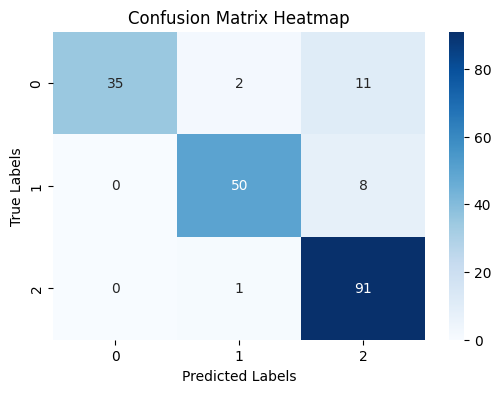

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


The data that I have used is completely categorical and I do not have any continuous and quantitative columns apart from Lattitude and longitude. However these column will not help in predicting the labels. Hence, using a different data from the purpose below of demostrating Linear Regression.

In [23]:
df = pd.read_csv('/content/sales_data.csv')
df.head(5)

,TotalBsmtSF,GrLivArea,GarageArea,SalePrice,OverallQual
0,856,1710,548,208500,7
1,1262,1262,460,181500,6
2,920,1786,608,223500,7
3,756,1717,642,140000,7
4,1145,2198,836,250000,8


Data Cleaning:

In [24]:
print(df.dtypes)

# Checking for duplicates
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Removeing duplicates
df = df.drop_duplicates()
print("Shape of the dataset after removing duplicates:", df.shape)

TotalBsmtSF    int64
GrLivArea      int64
GarageArea     int64
SalePrice      int64
OverallQual    int64
dtype: object
Number of duplicate rows: 1
Shape of the dataset after removing duplicates: (1093, 5)


In [25]:
# Checking missing values
print(df.isnull().sum())


TotalBsmtSF    0
GrLivArea      0
GarageArea     0
SalePrice      0
OverallQual    0
dtype: int64


In [26]:
#Checking outliers
def calculate_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    num_outliers = len(outliers)
    total_values = len(column)
    outlier_percentage = (num_outliers / total_values) * 100
    return num_outliers, outlier_percentage

# Find outliers in numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
outlier_results = []
for column in numeric_columns:
    num_outliers, outlier_percentage = calculate_outliers(df[column])
    outlier_results.append((column, num_outliers, outlier_percentage))

# Print the outlier results
print("Outlier Analysis:")
for column, num_outliers, outlier_percentage in outlier_results:
    print(f"{column}: Number of outliers = {num_outliers}, Percentage of outliers = {outlier_percentage:.2f}%")

Outlier Analysis:
TotalBsmtSF: Number of outliers = 13, Percentage of outliers = 1.19%
GrLivArea: Number of outliers = 29, Percentage of outliers = 2.65%
GarageArea: Number of outliers = 16, Percentage of outliers = 1.46%
SalePrice: Number of outliers = 50, Percentage of outliers = 4.57%
OverallQual: Number of outliers = 0, Percentage of outliers = 0.00%


In [27]:
# Function to remove outliers
def remove_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Removing outliers from numeric columns
cleaned_data = df.copy()
for column in numeric_columns:
    cleaned_data[column] = remove_outliers(cleaned_data[column])

print("Cleaned Data:")
print(cleaned_data)


Cleaned Data:
      TotalBsmtSF  GrLivArea  GarageArea  SalePrice  OverallQual
0           856.0     1710.0       548.0   208500.0            7
1          1262.0     1262.0       460.0   181500.0            6
2           920.0     1786.0       608.0   223500.0            7
3           756.0     1717.0       642.0   140000.0            7
4          1145.0     2198.0       836.0   250000.0            8
...           ...        ...         ...        ...          ...
1089        953.0     1647.0       460.0   175000.0            6
1090       1542.0     2073.0       500.0   210000.0            6
1091       1152.0     2340.0       252.0   266500.0            7
1092       1078.0     1078.0       240.0   142125.0            5
1093       1256.0     1256.0       276.0   147500.0            5

[1093 rows x 5 columns]


In [28]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])

# Normalization (Alternative to Standardization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_normalized[numeric_columns])


# Print the shape of the standardized and normalized
print("Shape of standardized DataFrame:", df_standardized.shape)
print("Shape of normalized DataFrame:", df_normalized.shape)

Shape of standardized DataFrame: (1093, 5)
Shape of normalized DataFrame: (1093, 5)


In [29]:
df_normalized.head(5)

,TotalBsmtSF,GrLivArea,GarageArea,SalePrice,OverallQual
0,0.125062,0.244427,0.308426,0.240644,0.625
1,0.192673,0.158340,0.238474,0.203128,0.500
2,0.135720,0.259032,0.356121,0.261487,0.625
3,0.108410,0.245772,0.383148,0.145464,0.625
4,0.173189,0.338201,0.537361,0.298308,0.750


EDA:

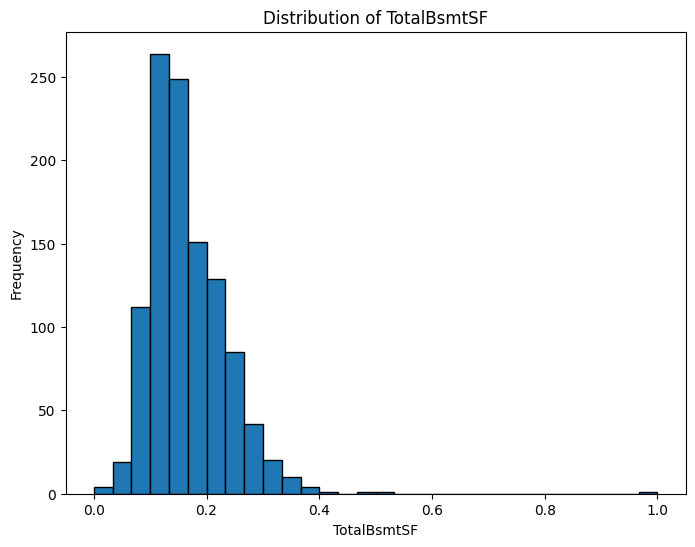

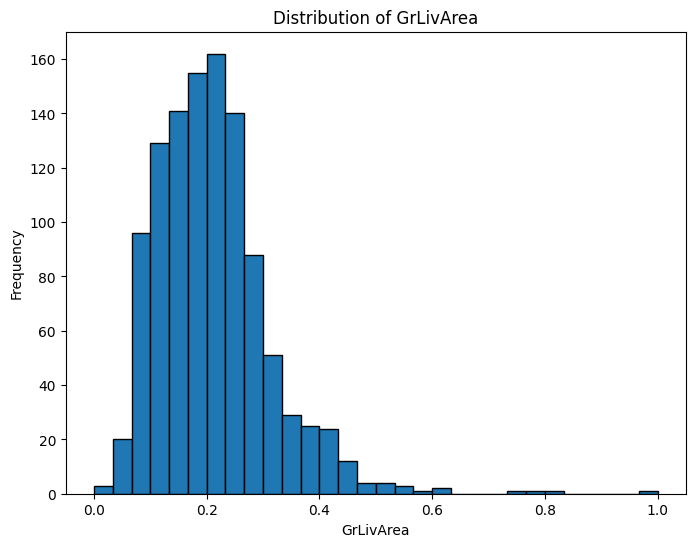

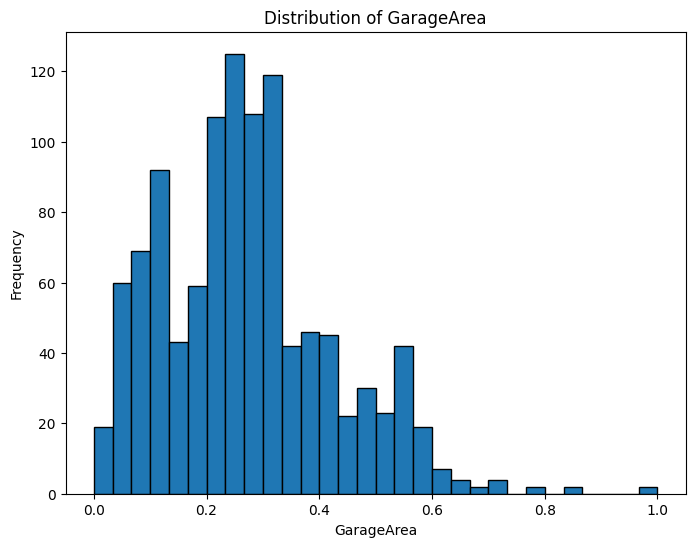

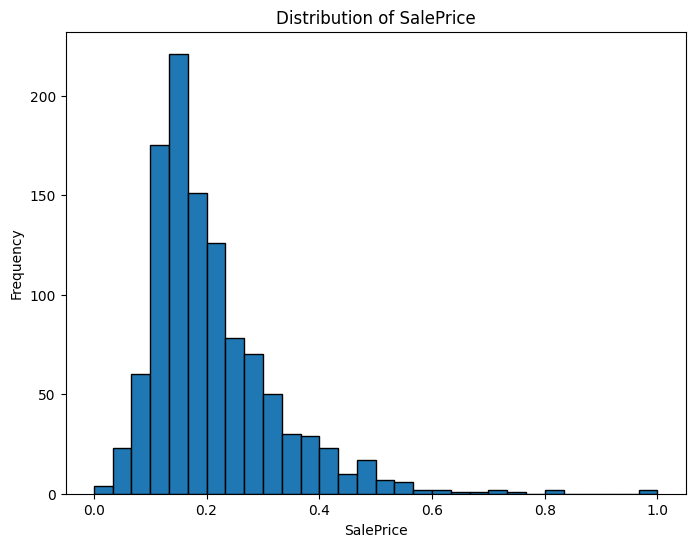

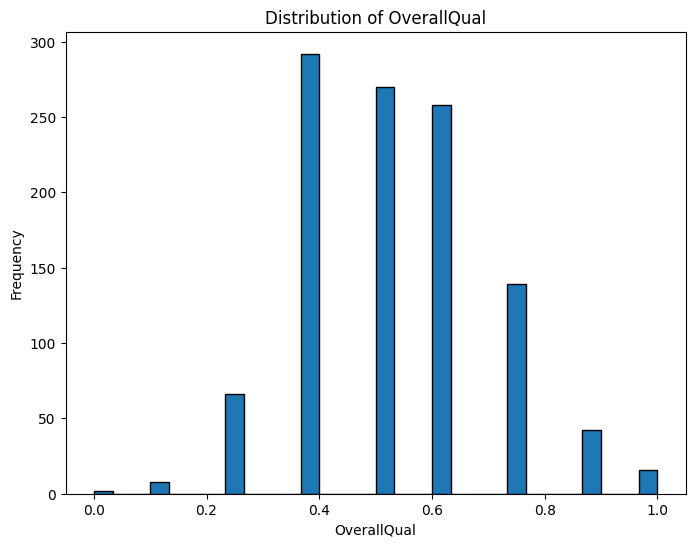

In [30]:
# Creating Function as there are more than 10 columns

# Select numeric columns
numeric_columns = df_normalized.select_dtypes(include=[np.number]).columns

# Distributions
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_normalized[column], bins=30, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

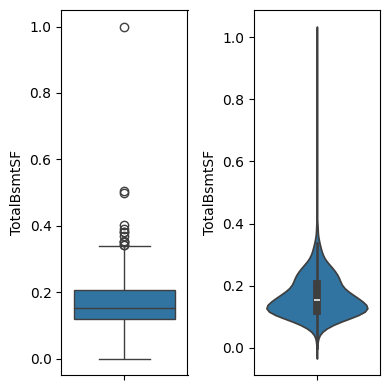

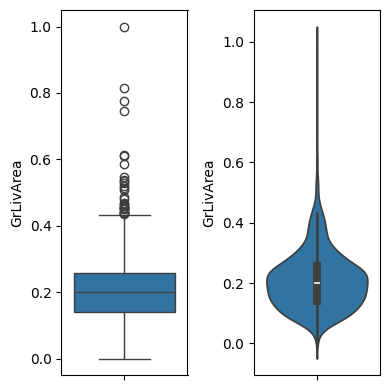

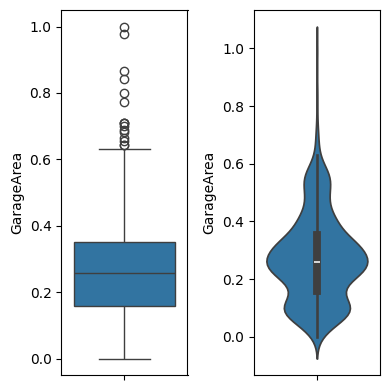

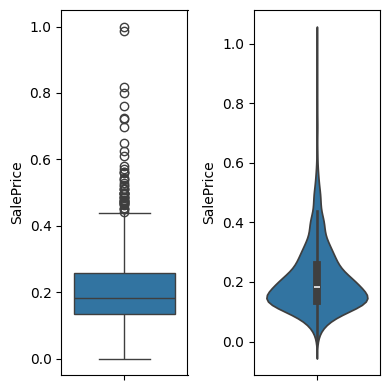

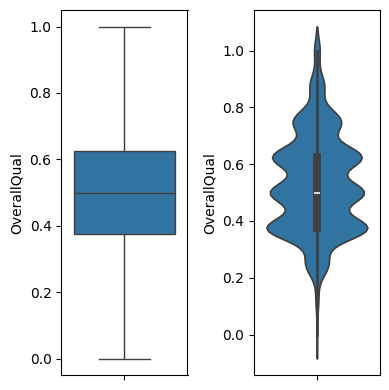

In [31]:

# Outlier identification (Box Plot, Violin Plot)
for column in numeric_columns:
    plt.figure(figsize=(4, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=column, data=df_normalized)
    plt.subplot(1, 2, 2)
    sns.violinplot(y=column, data=df_normalized)
    plt.tight_layout()
    plt.show()

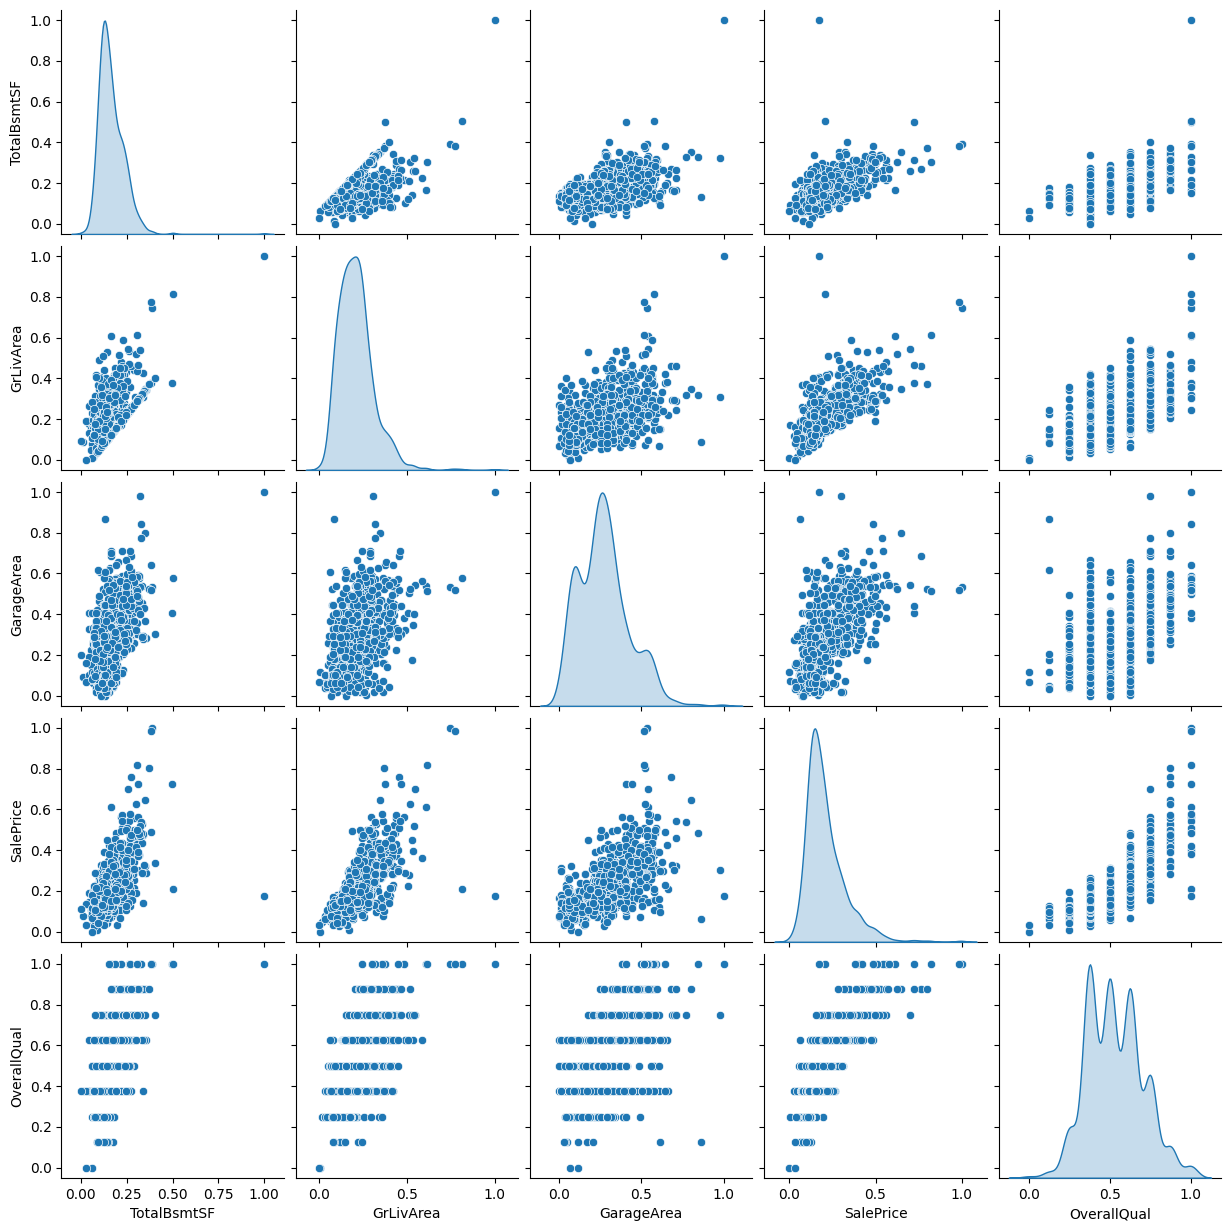

In [32]:
# Pairplots (To see Correlation)
sns.pairplot(df_normalized[numeric_columns], diag_kind='kde')
plt.show()

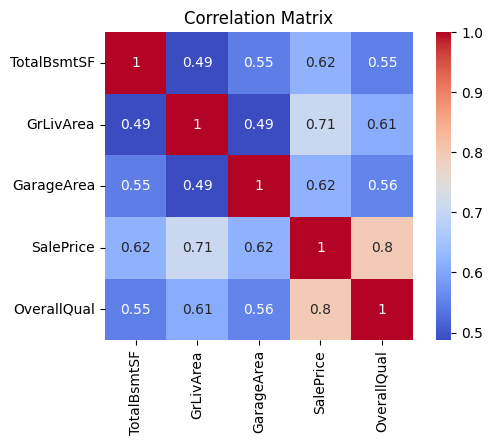

In [33]:
# Correlation plots with output variable = 'SalePrice'
correlation_matrix = df_normalized[numeric_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation Matrix')
plt.show()


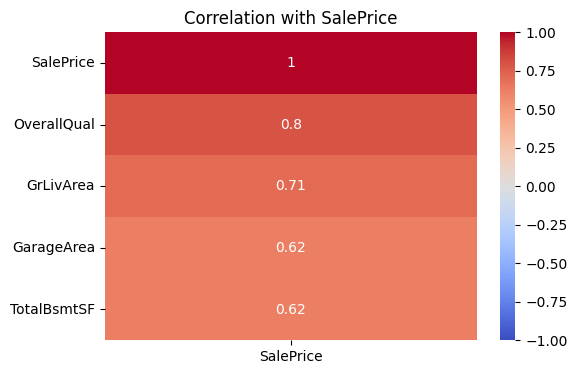

In [34]:
# HeatMap (To get correlation in metric format)
target_column = 'SalePrice'
plt.figure(figsize=(6, 4))
sns.heatmap(df_normalized[numeric_columns].corr()[[target_column]].sort_values(by=target_column, ascending=False),
            cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.title('Correlation with SalePrice')
plt.show()

- Fitting Linear regression Model:

Here we can see that OverallQual as in the overall quality of house is higly correleted with sales price of the house. Hence, fitting a linear regression to our data where GrLivArea is predictor and SalePrice is the respondent.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_normalized[['OverallQual']]  # Predictor variable with the highest correlation
y = df_normalized['SalePrice']     # Response variable

# Instantiating the Linear Regression model
model = LinearRegression()

# Fitting the model to the data
model.fit(X, y)


LinearRegression()

In [36]:
from scipy import stats

# Predict the target variable
y_pred = model.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate the R-squared value
r_squared = r2_score(y, y_pred)

# Calculate the standard errors of coefficients
n = len(y)
p = X.shape[1]  # Number of predictors
X = np.array(X)  # Convert X to numpy array
X_with_intercept = np.column_stack((np.ones(n), X))  # Add intercept term
y_pred = np.array(y_pred)  # Convert y_pred to numpy array
residuals = y - y_pred  # Calculate residuals
RSS = np.sum(residuals ** 2)  # Residual sum of squares
sigma_squared_hat = RSS / (n - p - 1)  # Estimate of variance of residuals
X_T_X_inv = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))  # Inverse of X'X
SE_beta = np.sqrt(np.diagonal(sigma_squared_hat * X_T_X_inv))  # Standard errors of coefficients

# Calculate t-statistics and p-values for hypothesis testing
t_values = model.coef_ / SE_beta[1:]  # Exclude intercept SE
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=n - p - 1))  # Two-tailed test

# Print the model summary
print("Model Summary:")
print("-------------")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")
print("\nCoefficient Statistics:")




Model Summary:
-------------
Intercept: -0.07491257980719704
Coefficient: 0.5383056817663597
Mean Squared Error: 0.004895193649129451
R-squared: 0.6333517475658305

Coefficient Statistics:


This model has very high MSE and lor R sq. Additionally, there are many predictors which are correlated with out response.

So, applying MLR on the data to see if it is a better model.

First, splitting data into train and test like it is done for every other model in this project and fitting the MLR model on train and testing on test

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


X = df_normalized.drop(columns=['SalePrice'])
y = df_normalized['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LinearRegression()

In [38]:
# Instantiating the LinearRegression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [39]:
X_train.head(5)

,TotalBsmtSF,GrLivArea,GarageArea,OverallQual
6,0.263281,0.241353,0.378378,0.750
789,0.181182,0.208493,0.252782,0.500
775,0.135720,0.099154,0.063593,0.375
846,0.237302,0.209839,0.373609,0.625
662,0.000000,0.090699,0.201908,0.375


In [40]:
X_test.head(5)

,TotalBsmtSF,GrLivArea,GarageArea,OverallQual
482,0.158368,0.118755,0.330684,0.500
139,0.126395,0.081860,0.152623,0.375
88,0.169858,0.132014,0.214626,0.375
838,0.271274,0.249039,0.610493,0.750
732,0.080433,0.126249,0.082671,0.500


In [41]:
y_train.head(5)

6      0.377509
789    0.201044
775    0.117327
846    0.310813
662    0.112116
Name: SalePrice, dtype: float64

In [42]:
y_test.head(5)

482    0.151022
139    0.127401
88     0.166307
838    0.392793
732    0.145464
Name: SalePrice, dtype: float64

In [43]:
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

X_train_with_intercept = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train_with_intercept)
ols_results = ols_model.fit()

print(ols_results.summary())

# Optionally, analyze the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error: 0.0030450603797498974
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     599.5
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          4.17e-248
Time:                        23:36:28   Log-Likelihood:                 1235.9
No. Observations:                 874   AIC:                            -2462.
Df Residuals:                     869   BIC:                            -2438.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

This looks like a best model to predict housing prices.